# ENTRAINEMENT DU MODELE SUR LE DATASET 8RGB : IMAGES 8x8 EN RGB

In [39]:
#cd "C:\Users\donfa\OneDrive\Desktop\PROJET MACHINE LEARNING\skin-cancer-prediction-bcc"

In [40]:
import pandas as pd
from rich.jupyter import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns



## ENTRAINEMENT AVEC LE DATASET 8RGB : IMAGES 8x8 EN RGB

In [41]:
# Charger le dataset
dataset_path = "data/processed/Meta_Data_Processed_8RGB.csv"
df = pd.read_csv(dataset_path)


print(f"Dimensions du dataset : {df.shape}")
df.head()

Dimensions du dataset : (10015, 209)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,199,156,188,210,165,198,216,176,203,215,...,0,0,0,0,0,0,1,0,0,0
1,115,87,115,180,133,158,200,153,187,215,...,0,0,0,0,0,0,1,0,0,0
2,203,146,164,209,144,153,217,160,181,215,...,0,0,0,0,0,0,1,0,0,0
3,135,96,110,198,141,156,208,148,158,210,...,0,0,0,0,0,0,1,0,0,0
4,204,156,187,232,185,216,236,196,220,217,...,0,0,0,0,0,0,0,0,0,0


#### Le dataset contient 209 colonnes de pixels (8x8) et 7 colonnes de métadonnées. , nous allons eliminer la colone label , car elle est redondante avec la colonne is_bcc

In [42]:
# Supprimer la colonne 'label'
df.drop('label', axis=1, inplace=True)

#### Leger resumé des données

In [43]:
# Informations sur le dataset
print("\nRésumé des données :")
(df.info())



Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 208 entries, pixel0000 to localization_upper extremity
dtypes: float64(1), int64(207)
memory usage: 15.9 MB


#### Gestion des evenuelles valeurs manquantes

In [44]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Gestion des valeurs manquantes (imputation par la moyenne pour les colonnes numériques)
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Confirmation des modifications
print("\nDataset après nettoyage :")
print(df_cleaned.head())
print(f"Dimensions après nettoyage : {df_cleaned.shape}")


Valeurs manquantes par colonne :
age    57
dtype: int64

Dataset après nettoyage :
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        199        156        188        210        165        198   
1        115         87        115        180        133        158   
2        203        146        164        209        144        153   
3        135         96        110        198        141        156   
4        204        156        187        232        185        216   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  localization_face  \
0        216        176        203        215  ...                  0   
1        200        153        187        215  ...                  0   
2        217        160        181        215  ...                  0   
3        208        148        158        210  ...                  0   
4        236        196        220        217  ...                  0   

   localization_foot  localization_genital  locali

### Division des Données en Ensembles d’Entraînement et de Test

In [45]:
X = df_cleaned.drop(columns=['is_bcc'], errors='ignore')  # 'is_bcc' est la cible
y = df_cleaned['is_bcc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensions des ensembles d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Dimensions des ensembles de test : {X_test.shape}, {y_test.shape}")



Dimensions des ensembles d'entraînement : (8012, 207), (8012,)
Dimensions des ensembles de test : (2003, 207), (2003,)


### Standardisation des Caractéristiques
Pour de meilleurs résultats avec certains modèles, il est important de standardiser les données.

In [46]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAperçu des données standardisées (entraînement) :")
pd.DataFrame(X_train_scaled, columns=X.columns).head()



Aperçu des données standardisées (entraînement) :


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.783613,0.114834,0.369125,0.888186,-0.074845,0.175703,1.053592,0.050119,0.294038,1.197950,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179
1,-0.668799,-1.129484,-0.243068,-1.072210,-1.038928,0.110362,-0.960353,-0.356877,0.395093,-0.758139,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,2.807576
2,-1.971697,-1.903726,-1.671519,-1.439784,-1.038928,-0.869748,-1.355950,-0.652874,-0.480718,-1.053398,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,6.433625,-0.356179
3,-0.604722,0.419000,0.267093,-0.949685,0.425050,0.306384,-1.212096,0.309117,0.125613,-1.164120,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179
4,-1.074620,-0.299939,-0.064512,-1.470416,-0.110552,0.045022,-1.751546,-0.245878,-0.244923,-1.680822,...,-0.28143,-0.18639,-0.071719,-0.093882,1.968869,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179


### Modèle de régression logistique sur 8RGB

Exactitude (Accuracy) : 0.96
Score ROC-AUC : 0.95


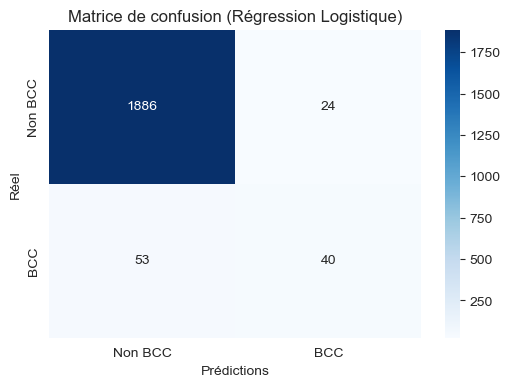

In [47]:

# Entraînement
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Prédictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"Exactitude (Accuracy) : {accuracy_logreg:.2f}")
print(f"Score ROC-AUC : {roc_auc_logreg:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (Régression Logistique)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/8RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/8RGB'):
    os.makedirs('reports/images/entrainement/8RGB')
plt.savefig('reports/images/entrainement/8RGB/mat_conf_logreg_8RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/8RGB
filename = 'models/model_logreg_8RGB.pkl'
pickle.dump(logreg, open(filename, 'wb'))




### On remarque que la regression logistique a une accuracy de 0.96 et un score roc-auc de 0.95 cependant on peut essayer d'autres algorithmes pour voir si on peut avoir de meilleurs resultats , car pour la regression logistique le nombre de faux negatifs est assez eleve

### Modèle Random Forest sur 8RGB

Exactitude (Accuracy) : 0.96
Score ROC-AUC : 0.92


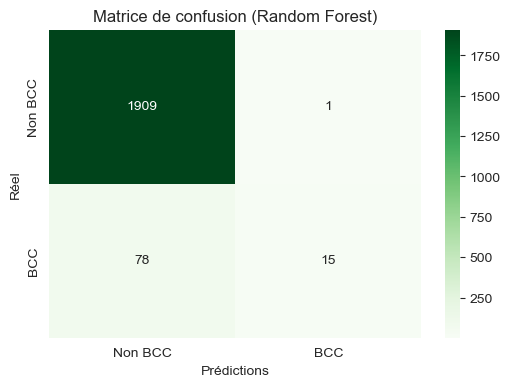

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Exactitude (Accuracy) : {accuracy_rf:.2f}")
print(f"Score ROC-AUC : {roc_auc_rf:.2f}")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (Random Forest)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/8RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/8RGB'):
    os.makedirs('reports/images/entrainement/8RGB')
plt.savefig('reports/images/entrainement/8RGB/mat_conf_rf_8RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/8RGB
filename = 'models/model_rf_8RGB.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele Random Forest a une accuracy de 0.96 et un score roc-auc de 0.92 , on peut dire que c'est un tres bon modele pour la prediction de BCC , bien que le nombre de faux negatifs soit assez eleve , on peut essayer d'autres algorithmes pour voir si on peut avoir de meilleurs resultats

### Arbres de Décision sur 8RGB

Exactitude (Accuracy) : 0.93
Score ROC-AUC : 0.63


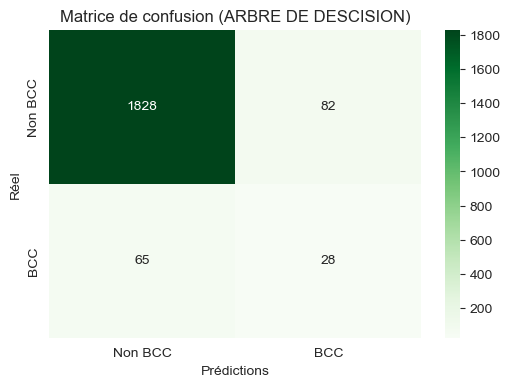

In [50]:
# Entraînement
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Prédictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print(f"Exactitude (Accuracy) : {accuracy_dt:.2f}")
print(f"Score ROC-AUC : {roc_auc_dt:.2f}")

# Matrice de confusion
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (ARBRE DE DESCISION)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/8RGB avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/8RGB'):
    os.makedirs('reports/images/entrainement/8RGB')
plt.savefig('reports/images/entrainement/8RGB/mat_conf_dt_8RGB.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/8RGB
filename = 'models/model_dt_8RGB.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele d'arbre de decision identifie plus de cas BCC que les autres et mais moins de faux negatifs , il sera sans doute meilleur avec un jeu de donnees plus detaille 

## RECAPITULATIF DES MODELES SUR LE DATASET 8RGB : IMAGES 8x8 EN RGB on constate une legere amelioration du modele
- Regression Logistique : Accuracy = 0.96, ROC-AUC = 0.95 , meilleur modele pour la prediction de BCC
- Random Forest : Accuracy = 0.96, ROC-AUC = 0.92 , moins de faux negatifs que les autres modeles mais plus de faux positifs
- Decision Tree : Accuracy = 0.93, ROC-AUC = 0.63 , meilleur modele pour la prediction de BCC

## ENTRAINEMENT SUIVANT AVEC LE DATASET 28RGB : IMAGES 28x28 EN NIVEAU DE GRIS


# ON PEUT NOTER UNE CERTAINE AMELIORATION DES MODELES AVEC LE DATASET 8RGB , MAIS POUR SAVOIR SI LA COULEUR A UN REEL IMPACT PAR RAPPORT AU NOMBRE E PIXELS , NOUS ALLONS ENTRAINER LE MODELE AVEC LE DATASET 28L 